# Hands-on Classification Lab: Logistic Regression, kNN and PyTorch

In this lab you will:

- Create and visualize a 2D binary classification dataset.
- Train and evaluate **Logistic Regression** with scikit-learn.
- Train and evaluate a **k-Nearest Neighbors (kNN)** classifier.
- Implement **Logistic Regression in PyTorch** and train it on the same data.
- Explore the effect of hyperparameters (e.g. regularization, k, learning rate).


## 0. Setup

Run the cell below to import the libraries you will need.

If you are using Google Colab, you may first need to install some packages (uncomment the lines starting with `!pip`).

In [16]:
# If you are in Colab and these libraries are not installed, uncomment:
# !pip install scikit-learn torch matplotlib

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.datasets import make_moons

import torch
import torch.nn as nn
import torch.optim as optim

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

print("Setup complete.")


Setup complete.


## 1. Dataset: Two Moons

We will use the classic **two moons** dataset. It is a binary classification problem that is easy to visualize in 2D but not linearly separable.

### Tasks

1. Generate a two-moons dataset using `make_moons` with:
   - `n_samples = 1000`
   - `noise = 0.25`
   - `random_state = RANDOM_STATE`
2. Plot the dataset:
   - Use different colours for each class.
   - Label axes and add a title.
3. (Optional) Create a reusable function `plot_data(X, y)` to visualize any 2D dataset.


X shape: (1000, 2)
y shape: (1000,)
Class distribution: [500 500]


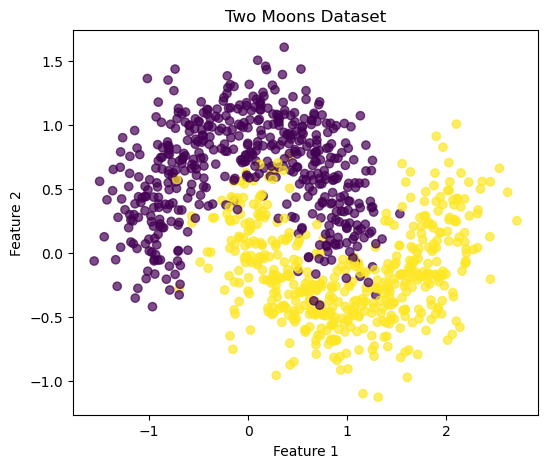

In [17]:
# TODO: Generate the dataset and plot it

# 1. Generate data

X, y = make_moons(n_samples=1000, noise=0.25, random_state=RANDOM_STATE)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Class distribution:", np.bincount(y))

# 2. Plot data
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Two Moons Dataset")
plt.show()

# 3. OPTIONAL: define a helper plotting function
def plot_data(X, y, title="Data"):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.7)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

# Example usage (uncomment):
# plot_data(X, y, title="Two Moons")


## 2. Train/Test Split and Feature Scaling

Before training models, we will:

1. Split the data into **training** and **test** sets (e.g. 70% training, 30% test).
2. Standardize the features using `StandardScaler` **fitted only on the training set**.

### Tasks

- Use `train_test_split` to create `X_train, X_test, y_train, y_test` with:
  - `test_size = 0.3`
  - `stratify = y`
  - `random_state = RANDOM_STATE`
- Fit a `StandardScaler` on `X_train` and transform both `X_train` and `X_test`.
- Print the shapes of the resulting arrays.


In [18]:
# TODO: Train/test split and scaling

# 1. Split data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size: ", X_test.shape[0])

# 2. Standardization
scaler = StandardScaler()


scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

print("X_train_std shape:", X_train_std.shape)
print("X_test_std shape: ", X_test_std.shape)


Train size: 700
Test size:  300
X_train_std shape: (700, 2)
X_test_std shape:  (300, 2)


### 2.1 Helper: Decision Boundary Plot

We will use a helper function to visualize decision boundaries for 2D classifiers.

### Task

- Implement `plot_decision_boundary(model, X, y, title)` that:
  - Creates a 2D grid of points in the feature space.
  - Uses `model.predict` to obtain predictions on the grid.
  - Plots the decision regions and the training points.

**Hint:**

- Use `np.meshgrid` to build a grid.
- Use `plt.contourf` to plot the regions.


In [ ]:
# TODO: Implement the decision boundary plotting function

def plot_decision_boundary(model, X, y, title="Decision boundary"):
    # X is 2D (N x 2)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    
    # Stack grid points
    grid = np.c_[xx.ravel(), yy.ravel()]
    

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    
    # Plot decision regions
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", alpha=0.7)
    plt.title(title)
    plt.xlabel("Feature 1 (std)")
    plt.ylabel("Feature 2 (std)")
    plt.show()

# You can test the function later after training a classifier.


SyntaxError: invalid syntax (3534364917.py, line 8)

## 3. Logistic Regression (scikit-learn)

In this section you will:

1. Train a **Logistic Regression** classifier on the standardized data.
2. Evaluate its performance (accuracy, confusion matrix, classification report).
3. Visualize its decision boundary.
4. Explore the effect of the regularization parameter `C`.

### 3.1 Baseline Logistic Regression

Use:

```python
LogisticRegression(solver="lbfgs", random_state=RANDOM_STATE)
```

### Tasks

- Fit the model on `X_train_std, y_train`.
- Predict on both `X_train_std` and `X_test_std`.
- Compute and print:
  - Training and test accuracy.
  - Confusion matrix on the test set.
  - Classification report on the test set.
- Plot the decision boundary on the **training data** using `plot_decision_boundary`.


In [ ]:
# TODO: Train and evaluate baseline Logistic Regression (scikit-learn)

# 1. Create the model

log_reg = LogisticRegression(solver="lbfgs", random_state=RANDOM_STATE)

# 2. Fit the model

log_reg.fit(X_train_std, y_train)

# 3. Predictions
y_train_pred = log_reg.predict(X_train_std)
y_test_pred = log_reg.predict(X_test_std)

# 4. Evaluation
print("Logistic Regression (sklearn) - Baseline")
print("-" * 50)
print(f"Train accuracy: {accuracy_score(y_train, y_train_pred):.3f}")
print(f"Test  accuracy: {accuracy_score(y_test, y_test_pred):.3f}")

print("\nConfusion matrix (test):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification report (test):")
print(classification_report(y_test, y_test_pred))

# 5. Decision boundary on training data
plot_decision_boundary(log_reg, X_train_std, y_train, title="LogReg (sklearn) - Train")


### 3.2 Effect of Regularization (C Parameter)

The `C` parameter in `LogisticRegression` controls the strength of regularization:

- Small `C` → stronger regularization.
- Large `C` → weaker regularization.

### Tasks

1. For `C` in a list such as `[0.01, 0.1, 1, 10, 100]`:
   - Train a `LogisticRegression` model.
   - Compute train and test accuracy.
2. Store the results and plot accuracy vs `C` (use a logarithmic x-axis).
3. Optionally, for one or two values of `C`, plot the decision boundary.


In [ ]:
# TODO: Explore different values of C for Logistic Regression

C_values = [0.01, 0.1, 1, 10, 100]
train_accs = []
test_accs = []

for C in C_values:
    
    model = LogisticRegression(solver="lbfgs", C=C, random_state=RANDOM_STATE)
    model.fit(X_train_std, y_train)
    
    y_train_pred_C = model.predict(X_train_std)
    y_test_pred_C = model.predict(X_test_std)
    
    train_acc = accuracy_score(y_train, y_train_pred_C)
    test_acc = accuracy_score(y_test, y_test_pred_C)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    print(f"C = {C:6.2f} | Train acc = {train_acc:.3f} | Test acc = {test_acc:.3f}")

# Plot accuracy vs C
plt.figure(figsize=(6, 5))
plt.plot(C_values, train_accs, marker="o", label="Train accuracy")
plt.plot(C_values, test_accs, marker="s", label="Test accuracy")
plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.title("Logistic Regression: Accuracy vs C")
plt.legend()
plt.grid(True)
plt.show()

# OPTIONAL: plot decision boundary for one of the C values
# Example for C = 1:
# best_model = LogisticRegression(solver="lbfgs", C=1.0, random_state=RANDOM_STATE)
# best_model.fit(X_train_std, y_train)
# plot_decision_boundary(best_model, X_train_std, y_train, title="LogReg (C=1) - Train")


## 4. k-Nearest Neighbors (kNN) Classifier

Now we will train a **kNN classifier** on the same standardized data.

### 4.1 kNN for Multiple k Values

### Tasks

1. For `k` in `[1, 3, 5, 10, 20, 50]`:
   - Train a `KNeighborsClassifier` on `X_train_std, y_train`.
   - Compute train and test accuracy.
2. Plot train and test accuracy as a function of `k`.
3. Select one or two values of `k` (e.g. small and large) and:
   - Print confusion matrix and classification report on the test set.
   - Plot the decision boundary on the training data.


In [ ]:
# TODO: Train and evaluate kNN for different k values

k_values = [1, 3, 5, 10, 20, 50]
knn_train_accs = []
knn_test_accs = []

for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    
    y_train_pred_knn = knn.predict(X_train_std)
    y_test_pred_knn = knn.predict(X_test_std)
    
    train_acc = accuracy_score(y_train, y_train_pred_knn)
    test_acc = accuracy_score(y_test, y_test_pred_knn)
    
    knn_train_accs.append(train_acc)
    knn_test_accs.append(test_acc)
    
    print(f"k = {k:2d} | Train acc = {train_acc:.3f} | Test acc = {test_acc:.3f}")

# Plot accuracy vs k
plt.figure(figsize=(6, 5))
plt.plot(k_values, knn_train_accs, marker="o", label="Train accuracy")
plt.plot(k_values, knn_test_accs, marker="s", label="Test accuracy")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.title("kNN: Accuracy vs k")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# OPTIONAL: inspect one or two specific k values in more detail

# Example: choose k = 5 (you can change this)
chosen_k = 5

knn_chosen = KNeighborsClassifier(n_neighbors=chosen_k)
knn_chosen.fit(X_train_std, y_train)

y_test_pred_chosen = knn_chosen.predict(X_test_std)

print(f"kNN with k = {chosen_k}")
print("-" * 40)
print("Confusion matrix (test):")
print(confusion_matrix(y_test, y_test_pred_chosen))

print("\nClassification report (test):")
print(classification_report(y_test, y_test_pred_chosen))

# Decision boundary on training data
plot_decision_boundary(knn_chosen, X_train_std, y_train, title=f"kNN (k={chosen_k}) - Train")


## 5. Logistic Regression with PyTorch

Now we will implement Logistic Regression **from scratch** using **PyTorch**.

We will reuse the **standardized** data (`X_train_std`, `X_test_std`).

Steps:

1. Convert numpy arrays to PyTorch tensors.
2. Define a logistic regression model using a single `nn.Linear` layer.
3. Train the model using `BCEWithLogitsLoss` and an optimizer (e.g. Adam).
4. Track and plot the training loss.
5. Evaluate accuracy, confusion matrix, and classification report.


### 5.1 Converting Data to Tensors

### Tasks

- Convert `X_train_std` and `X_test_std` to `torch.float32` tensors.
- Convert `y_train` and `y_test` to tensors of shape `(N, 1)` and dtype `torch.float32`.


In [ ]:
# TODO: Convert numpy arrays to PyTorch tensors

X_train_t = torch.tensor(X_train_std, dtype=torch.float32)
X_test_t = torch.tensor(X_test_std, dtype=torch.float32)

# y should be column vectors (N x 1)
y_train_t = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
y_test_t = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

print("X_train_t shape:", X_train_t.shape)
print("y_train_t shape:", y_train_t.shape)


### 5.2 Defining the PyTorch Logistic Regression Model

We will define a simple model:

\[ \hat{y} = \sigma(Wx + b) \]

but we will let `BCEWithLogitsLoss` handle the sigmoid, so the model will return **logits**.

### Tasks

- Define a class `LogisticRegressionTorch(nn.Module)` that:
  - Has one `nn.Linear` layer from input dimension to 1.
  - Returns the logits in `forward`.
- Instantiate the model using the correct input dimension.


In [ ]:
# TODO: Define a logistic regression model in PyTorch

class LogisticRegressionTorch(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        
        self.linear = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        # Return logits (no sigmoid here)
        
        logits = self.linear(x)
        return logits

input_dim = X_train_t.shape[1]
model = LogisticRegressionTorch(input_dim)
print(model)


### 5.3 Training Loop

We will train the model using:

- Loss: `nn.BCEWithLogitsLoss()`
- Optimizer: `optim.Adam`
- Number of epochs: e.g. 500–1000

### Tasks

- Instantiate the loss and optimizer.
- Implement the training loop:
  - Compute logits: `logits = model(X_train_t)`
  - Compute loss.
  - Backpropagation and optimizer step.
  - Store the loss value in a list for plotting.
- After training, plot the loss curve.


In [ ]:
# TODO: Implement the training loop for PyTorch logistic regression

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 800
loss_history = []

for epoch in range(num_epochs):
    # Forward pass
    logits = model(X_train_t)
    
    # Compute loss
    loss = criterion(logits, y_train_t)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_history.append(loss.item())
    
    # Print progress occasionally
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {loss.item():.4f}")

# Plot training loss curve
plt.figure(figsize=(6, 5))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("PyTorch Logistic Regression - Training Loss")
plt.grid(True)
plt.show()


### 5.4 Evaluation

### Tasks

- Use `model` to compute logits for `X_train_t` and `X_test_t` in `torch.no_grad()` mode.
- Convert logits to probabilities using `torch.sigmoid`.
- Convert probabilities to class predictions using a threshold of 0.5.
- Compute and print:
  - Train and test accuracy.
  - Confusion matrix and classification report on the test set.
- (Optional) For comparison, visualize the decision boundary using scikit-learn style:
  - Extract model weights and bias.
  - Build a small wrapper with a `predict` method that uses these parameters on numpy arrays.


In [ ]:
# TODO: Evaluate the PyTorch logistic regression model

with torch.no_grad():
    train_logits = model(X_train_t)
    test_logits = model(X_test_t)
    
    train_probs = torch.sigmoid(train_logits)
    test_probs = torch.sigmoid(test_logits)
    
    # Convert probabilities to binary predictions
    train_pred_t = (train_probs >= 0.5).int()
    test_pred_t = (test_probs >= 0.5).int()

# Convert to numpy for sklearn metrics
y_train_pred_t = train_pred_t.numpy().ravel()
y_test_pred_t = test_pred_t.numpy().ravel()

print("PyTorch Logistic Regression")
print("-" * 40)
print(f"Train accuracy: {accuracy_score(y_train, y_train_pred_t):.3f}")
print(f"Test  accuracy: {accuracy_score(y_test, y_test_pred_t):.3f}")

print("\nConfusion matrix (test):")
print(confusion_matrix(y_test, y_test_pred_t))

print("\nClassification report (test):")
print(classification_report(y_test, y_test_pred_t))


In [ ]:
# OPTIONAL: Visualize PyTorch model decision boundary using a wrapper

class TorchLogRegWrapper:
    """Wraps the trained PyTorch model into an object with a .predict() method
    so we can reuse plot_decision_boundary (which expects sklearn-style objects).
    """
    def __init__(self, model, device="cpu"):
        self.model = model.to(device)
        self.device = device
    
    def predict(self, X_np):
        # X_np: numpy array (N x 2)
        self.model.eval()
        with torch.no_grad():
            X_t = torch.tensor(X_np, dtype=torch.float32, device=self.device)
            logits = self.model(X_t)
            probs = torch.sigmoid(logits)
            preds = (probs >= 0.5).int().cpu().numpy().ravel()
        return preds

torch_wrapper = TorchLogRegWrapper(model)
plot_decision_boundary(torch_wrapper, X_train_std, y_train, title="PyTorch LogReg - Train")


## 6. (Optional) Further Experiments

Ideas for additional coding experiments:

- Change the noise level in `make_moons` and see how results change.
- Try different learning rates and numbers of epochs in the PyTorch model.
- Use mini-batches instead of full-batch training.
- Try a different dataset, such as `sklearn.datasets.make_classification`.

You can add new cells below and experiment.
